# Programming and Critical Analysis


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
sns.set_style('darkgrid')

# Load data
data = loadarff('data/kin8nm.arff')
df = pd.DataFrame(data[0])

X = df.drop('y', axis=1).values
y = df['y'].values

X_train, X_test, y_train, y_test = train_test_split(
  X, y,
  test_size=0.3,
  random_state=0
)

In [11]:
def predict(regressor):
  regressor.fit(X_train, y_train)
  return regressor.predict(X_test)

def plot_regressors_residues():
  """Utilized for answering question 5."""
  global regressors
  predictions = []
  descriptions = []
  for description, regressor in regressors.items():
    predictions.append(predict(regressor))
    descriptions.append(description)

  fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 12))

  data = pd.DataFrame({
    description: np.abs(y_test - prediction)
    for description, prediction in zip(descriptions, predictions)
  })
  
  sns.histplot(
    data=data,
    bins=30,
    ax=ax1,
    multiple='dodge',
  )
  ax1.set_title('Residues histogram for each regressor')
  ax1.set_xlabel('Residue')
  ax1.set_ylabel('Count')
  ax1.legend(descriptions)

  sns.boxplot(
    data=data,
    ax=ax2,
    orient='h',
  )
  ax2.set_title('Residues boxplot for each regressor')
  ax2.set_xlabel('Residue')
  ax2.set_ylabel('Regressor')
  plt.savefig('assets/residues.png')


def print_regressor(regressor, description, y_pred):
  """Utilized for answering questions 4. and 6."""
  print(description)
  print('MAE: {:.5f}'.format(mean_absolute_error(y_test, y_pred)))
  if "MLP" in description:
    print('Iterations: {}'.format(regressor.n_iter_))

In [9]:
regressors = {
  "Ridge": Ridge(alpha=0.1),
  "MLP 1": MLPRegressor(
    hidden_layer_sizes=(10, 10),
    activation='tanh',
    max_iter=500,
    random_state=0,
    early_stopping=True
  ),
  "MLP 2": MLPRegressor(
    hidden_layer_sizes=(10, 10),
    activation='tanh',
    max_iter=500,
    random_state=0
  )
}

for description, regressor in regressors.items():
  y_pred = predict(regressor)
  print("---")
  print_regressor(regressor, description, y_pred)

---
Ridge
MAE: 0.16283
---
MLP 1
MAE: 0.06804
Iterations: 452
---
MLP 2
MAE: 0.09781
Iterations: 77


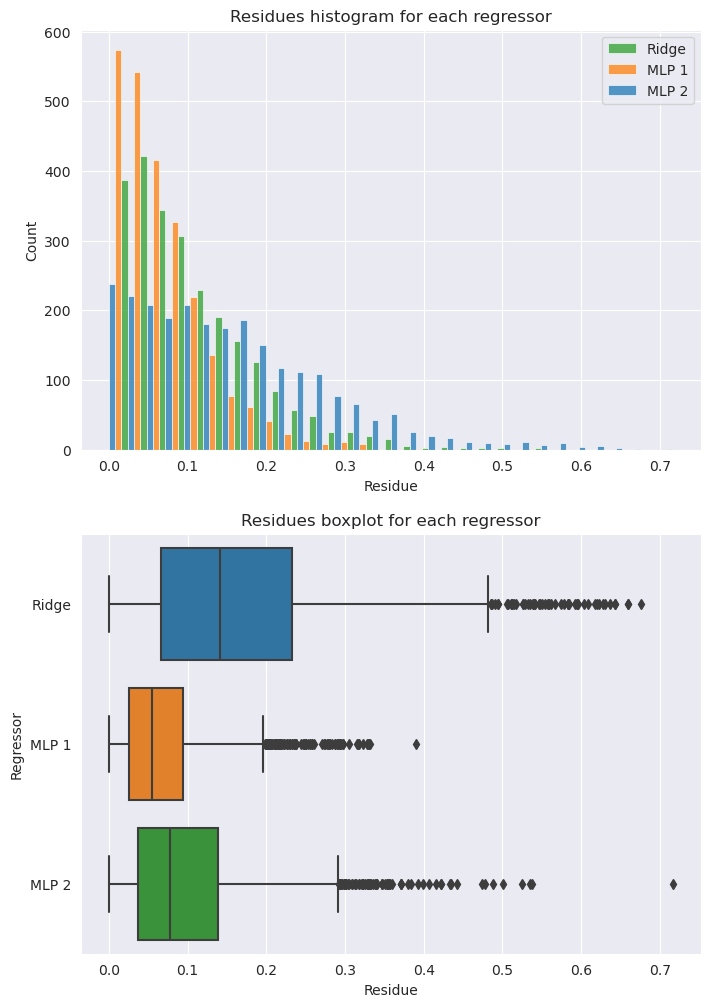

In [12]:
plot_regressors_residues()

----